In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest

FEATURE_AMOUNT = [5, 10, 40, 100, 250, 700]
SEED = 1
SPLIT = 0.3

#### Loading data

In [10]:
df = loadarff('data/pd_speech.arff')
df = pd.DataFrame(df[0])
df['class'] = df['class'].str.decode('utf-8')

The first step should be splitting the dataset into stratified training and testing sets (70-30 split) with a fixed seed (`random_state=1`).

In [11]:
X, y = df.drop('class', axis=1), df['class']
X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=SPLIT,
  random_state=SEED,
  stratify=y
)

Now, time to finally assess (in a single plot) both the training and testing accuracies of a decision tree with no depth limits (and remaining default behavior) for a varying number of selected features.

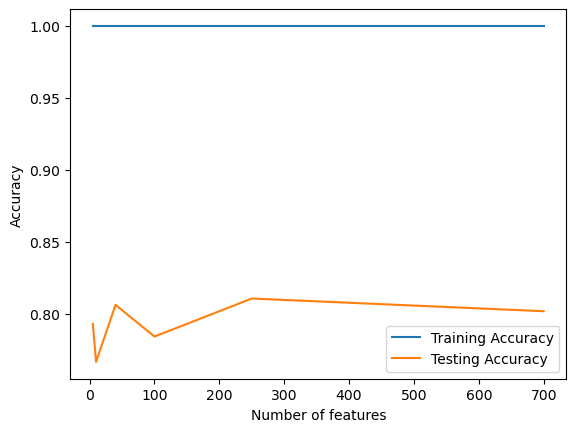

In [13]:
CLF = DecisionTreeClassifier(random_state=SEED)
def train_and_test(X_train, X_test, y_train, y_test):
    CLF.fit(X_train, y_train)
    y_pred = CLF.predict(X_test)
    return accuracy_score(y_test, y_pred)
def mutual_info_classif_custom(X, y):
    return mutual_info_classif(X, y, random_state=SEED)

train_accuracies = []
test_accuracies = []

for n in FEATURE_AMOUNT:
    selector = SelectKBest(score_func=mutual_info_classif_custom, k=n)
    selector.fit(X_train, y_train)
    X_train_new = selector.transform(X_train)
    X_test_new = selector.transform(X_test)
    train_accuracies.append(train_and_test(X_train_new, X_train_new, y_train, y_train))
    test_accuracies.append(train_and_test(X_train_new, X_test_new, y_train, y_test))

plt.plot(FEATURE_AMOUNT, train_accuracies, label='Training Accuracy')
plt.plot(FEATURE_AMOUNT, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.legend()
plt.show()